In [2]:
import pandas as pd

# Replace 'file_path.parquet' with the actual path to your .parquet file
file_path = r'C:\Users\Akshat Agarwal\Desktop\Data_Science\Kaggle\ESA_Try\train.parquet'
df = pd.read_parquet(file_path)

print(df)

                id  channel_1  channel_10  channel_11  channel_12  channel_13  \
0                0    0.13791         0.0         0.0    0.317175    0.371764   
1                1    0.13791         0.0         0.0    0.317175    0.371764   
2                2    0.13791         0.0         0.0    0.317175    0.371764   
3                3    0.13791         0.0         0.0    0.317175    0.371764   
4                4    0.13791         0.0         0.0    0.317175    0.371764   
...            ...        ...         ...         ...         ...         ...   
14728316  14728316    0.13791         0.0         0.0    0.218915    0.270384   
14728317  14728317    0.13791         0.0         0.0    0.218915    0.268824   
14728318  14728318    0.13791         0.0         0.0    0.218915    0.268824   
14728319  14728319    0.13791         0.0         0.0    0.218915    0.268824   
14728320  14728320    0.13791         0.0         0.0    0.215795    0.270384   

          channel_14  chann

In [7]:
column_headers = df.columns.tolist()
print(column_headers)


['id', 'channel_1', 'channel_10', 'channel_11', 'channel_12', 'channel_13', 'channel_14', 'channel_15', 'channel_16', 'channel_17', 'channel_18', 'channel_19', 'channel_2', 'channel_20', 'channel_21', 'channel_22', 'channel_23', 'channel_24', 'channel_25', 'channel_26', 'channel_27', 'channel_28', 'channel_29', 'channel_3', 'channel_30', 'channel_31', 'channel_32', 'channel_33', 'channel_34', 'channel_35', 'channel_36', 'channel_37', 'channel_38', 'channel_39', 'channel_4', 'channel_40', 'channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46', 'channel_47', 'channel_48', 'channel_49', 'channel_5', 'channel_50', 'channel_51', 'channel_52', 'channel_53', 'channel_54', 'channel_55', 'channel_56', 'channel_57', 'channel_58', 'channel_59', 'channel_6', 'channel_60', 'channel_61', 'channel_62', 'channel_63', 'channel_64', 'channel_65', 'channel_66', 'channel_67', 'channel_68', 'channel_69', 'channel_7', 'channel_70', 'channel_71', 'channel_72', 'channel_73', 'chann

In [10]:
anomaly_counts = df['is_anomaly'].value_counts(dropna=False)

# Calculate percentages
anomaly_percentages = df['is_anomaly'].value_counts(normalize=True, dropna=False) * 100

anomaly_summary = pd.DataFrame({
    'Count': anomaly_counts,
    'Percentage': anomaly_percentages.round(2)
})


print(anomaly_summary)

               Count  Percentage
is_anomaly                      
0           13184217       89.52
1            1544104       10.48


c:\Users\Akshat Agarwal\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


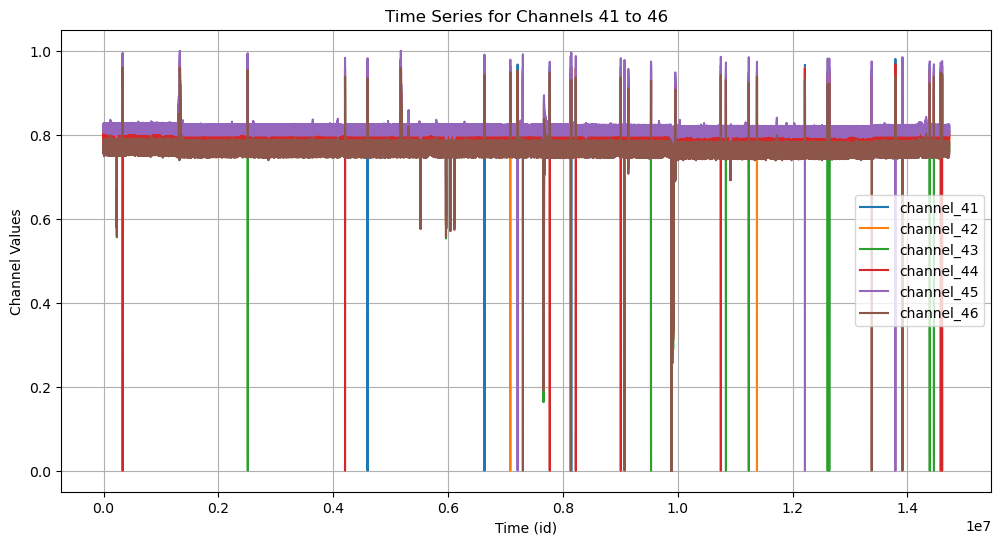

In [12]:
import matplotlib.pyplot as plt

# Select the columns for channels 41 to 46
channels_to_plot = ['channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']

# Plot the time series
plt.figure(figsize=(12, 6))
for channel in channels_to_plot:
    plt.plot(df['id'], df[channel], label=channel)

plt.xlabel('Time (id)')
plt.ylabel('Channel Values')
plt.title('Time Series for Channels 41 to 46')
plt.legend()
plt.grid()
plt.show()

In [13]:
subset_df = df[['id', 'is_anomaly', 'channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']]
print(subset_df.head())

   id  is_anomaly  channel_41  channel_42  channel_43  channel_44  channel_45  \
0   0           0    0.812578    0.786344    0.771900    0.799178    0.816855   
1   1           0    0.812578    0.786344    0.771900    0.799178    0.816855   
2   2           0    0.821213    0.789557    0.770317    0.809411    0.816006   
3   3           0    0.819642    0.786344    0.770317    0.807050    0.816855   
4   4           0    0.821996    0.788753    0.770317    0.807837    0.818551   

   channel_46  
0    0.765296  
1    0.765296  
2    0.765296  
3    0.766985  
4    0.761073  


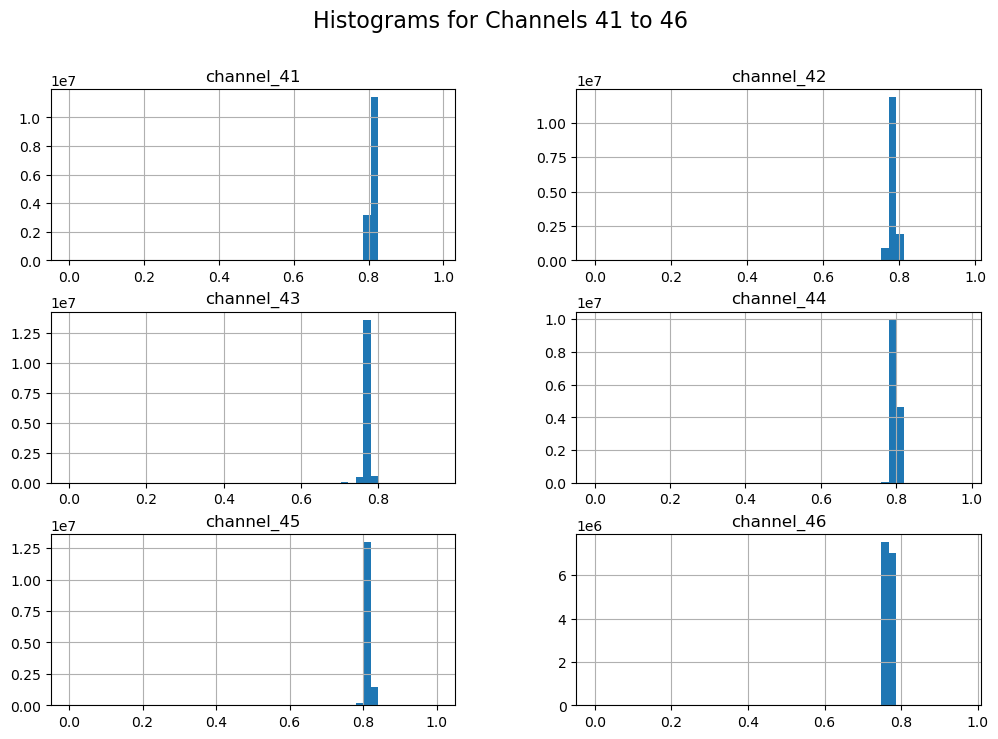

In [14]:
subset_df[['channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']].hist(figsize=(12, 8), bins=50)
plt.suptitle('Histograms for Channels 41 to 46', fontsize=16)
plt.show()

In [18]:
from scipy import stats

# Select the columns for analysis
channels = ['channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46']

# Initialize a dictionary to store the results
statistics = {}

# Calculate statistics for each channel
for channel in channels:
    data = subset_df[channel]
    statistics[channel] = {
        'Mean': data.mean(),
        'Median': data.median(),
        'Mode': stats.mode(data, keepdims=True).mode[0],
        'Min_value': data.min(),
        'Max_value': data.max(),
        '25th Percentile': data.quantile(0.25),
        '50th Percentile (Median)': data.median(),
        '75th Percentile': data.quantile(0.75),
        'Range': data.max() - data.min(),
        'Standard Deviation': data.std()
    }

# Convert the statistics dictionary to a DataFrame for better visualization
statistics_df = pd.DataFrame(statistics).T
print(statistics_df)

                Mean    Median      Mode  Min_value  Max_value  \
channel_41  0.808208  0.809439  0.806299        0.0   0.982110   
channel_42  0.782121  0.783130  0.778311        0.0   0.966273   
channel_43  0.768569  0.770317  0.770317        0.0   0.950728   
channel_44  0.794010  0.796030  0.792881        0.0   0.975506   
channel_45  0.810380  0.811767  0.805832        0.0   1.000000   
channel_46  0.765622  0.766985  0.762762        0.0   0.959530   

            25th Percentile  50th Percentile (Median)  75th Percentile  \
channel_41         0.805514                  0.809439         0.814149   
channel_42         0.778311                  0.783130         0.789557   
channel_43         0.766361                  0.770317         0.774274   
channel_44         0.791306                  0.796030         0.800752   
channel_45         0.806680                  0.811767         0.816855   
channel_46         0.761073                  0.766985         0.772895   

               Ran

Starting with classification

In [22]:
# Importing the required libraries
import numpy as np
from skforecast.datasets import fetch_dataset
from feature_engine.datetime import DatetimeFeatures
from feature_engine.creation import CyclicalFeatures
from feature_engine.timeseries.forecasting import WindowFeatures

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from skforecast.plot import plot_residuals
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
plt.style.use('seaborn-v0_8-darkgrid')

import xgboost
import lightgbm
import catboost
import sklearn
import shap
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer,
    PolynomialFeatures,
)
from sklearn.feature_selection import RFECV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

import skforecast
from skforecast.recursive import ForecasterEquivalentDate, ForecasterRecursive
from skforecast.model_selection import (
    TimeSeriesFold,
    OneStepAheadFold,
    bayesian_search_forecaster,
    backtesting_forecaster,
)
from skforecast.preprocessing import RollingFeatures
from skforecast.feature_selection import select_features
# from skforecast.metrics import calculate_coverage

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m' 
print(f"{color}Version skforecast: {skforecast.__version__}")
print(f"{color}Version scikit-learn: {sklearn.__version__}")
print(f"{color}Version lightgbm: {lightgbm.__version__}")
print(f"{color}Version xgboost: {xgboost.__version__}")
print(f"{color}Version catboost: {catboost.__version__}")
print(f"{color}Version pandas: {pd.__version__}")
print(f"{color}Version numpy: {np.__version__}")

Version skforecast: 0.14.0
Version scikit-learn: 1.3.2
Version lightgbm: 4.3.0
Version xgboost: 2.0.3
Version catboost: 1.2.5
Version pandas: 2.1.3
Version numpy: 1.23.0


In [ ]:
# Setting the index
subset_df = subset_df.set_index('id')

# Split into train, test and validate


In [24]:
# Calculate the split indices
train_size = int(len(subset_df) * 0.7)
validate_size = int(len(subset_df) * 0.15)

# Perform the splits
train_data = subset_df.iloc[:train_size]
validate_data = subset_df.iloc[train_size:train_size + validate_size]
test_data = subset_df.iloc[train_size + validate_size:]

# Print the sizes of the splits
print(f"Train data size: {len(train_data)}")
print(f"Validate data size: {len(validate_data)}")
print(f"Test data size: {len(test_data)}")

Train data size: 10309824
Validate data size: 2209248
Test data size: 2209249
